<a href="https://colab.research.google.com/github/ahan-2000/Car-Brand-Classifier-using-ResNet50-Architecture/blob/master/Transfer_Learning_Car_Brand_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Uploading the file

from google.colab import files
uploaded = files.upload()

Saving Datasets.zip to Datasets.zip


In [3]:
!unzip Datasets.zip

Archive:  Datasets.zip
   creating: Datasets/Test/
   creating: Datasets/Test/audi/
  inflating: Datasets/Test/audi/21.jpg  
  inflating: Datasets/Test/audi/22.jpg  
  inflating: Datasets/Test/audi/23.jpg  
  inflating: Datasets/Test/audi/24.jpg  
  inflating: Datasets/Test/audi/25.jpg  
  inflating: Datasets/Test/audi/26.jpg  
  inflating: Datasets/Test/audi/27.jpg  
 extracting: Datasets/Test/audi/28.jpg  
  inflating: Datasets/Test/audi/29.jpg  
   creating: Datasets/Test/lamborghini/
  inflating: Datasets/Test/lamborghini/1.jpg  
  inflating: Datasets/Test/lamborghini/10.jpg  
  inflating: Datasets/Test/lamborghini/11.jpg  
  inflating: Datasets/Test/lamborghini/12.jpg  
  inflating: Datasets/Test/lamborghini/13.jpg  
  inflating: Datasets/Test/lamborghini/14.jpg  
  inflating: Datasets/Test/lamborghini/15.jpg  
  inflating: Datasets/Test/lamborghini/16.jpg  
  inflating: Datasets/Test/lamborghini/17.jpg  
  inflating: Datasets/Test/lamborghini/18.jpg  
  inflating: Datasets/Test/l

In [4]:
!pip show tensorflow


Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: wrapt, tensorboard, google-pasta, scipy, h5py, termcolor, grpcio, protobuf, absl-py, tensorflow-estimator, wheel, opt-einsum, astunparse, gast, keras-preprocessing, numpy, six
Required-by: fancyimpute


In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [6]:
#Resizing Images
# We have given 224,224 size as ResNet model has been trained on this size
image_size=[224,224]
train_path= 'Datasets/Train'
test_path= 'Datasets/Test'

In [7]:
#Importing ResNet50
#[3] is concated with 224,224 as we have to define 3 channels i.e. RGB channel thus added
resnet= ResNet50(input_shape=image_size +[3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [8]:
#Checking ResNet Summary

resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [9]:
# Don't re-train previous trained weights, we will use previous weights

for layer in resnet.layers:
  layer.trainable = False

In [10]:
#We will use Glob Function to check the output folders
folders = glob('Datasets/Train/*')

In [11]:
folders

['Datasets/Train/audi',
 'Datasets/Train/lamborghini',
 'Datasets/Train/mercedes']

In [12]:
#creating our own layers, it will flatten the last output layer

x= Flatten()(resnet.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

#Create a model object

model= Model(inputs=resnet.input, outputs=prediction)

In [14]:
#View the summary of new 

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [15]:
#Compiling the models

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
#Using Image Generator

train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
training_set=train_datagen.flow_from_directory('Datasets/Train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 64 images belonging to 3 classes.


In [18]:
test_set=test_datagen.flow_from_directory('Datasets/Test', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 58 images belonging to 3 classes.


In [19]:
#Fitting the model

x = model.fit_generator(training_set,validation_data=test_set,epochs=50,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 1s 723ms/step - loss: 7.0786 - accuracy: 0.3906 - val_loss: 1.6307 - val_accuracy: 0.5345
Epoch 2/50
2/2 [==============================] - 1s 301ms/step - loss: 3.1452 - accuracy: 0.4062 - val_loss: 9.1317 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 1s 302ms/step - loss: 5.5315 - accuracy: 0.5000 - val_loss: 8.1649 - val_accuracy: 0.3448
Epoch 4/50
2/2 [==============================] - 1s 310ms/step - loss: 4.0840 - accuracy: 0.5938 - val_loss: 1.6828 - val_accuracy: 0.3621
Epoch 5/50
2/2 [==============================] - 1s 303ms/step - loss: 2.1336 - accuracy: 0.5156 - val_loss: 3.4836 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 1s 308ms/step - loss: 3.0862 - accuracy: 0.3906 - val_loss: 1.5533 - val_accuracy: 0.3966
Epoch 7/50
2/2 [==============================] - 1s 314ms/step - loss: 1.4531 - acc

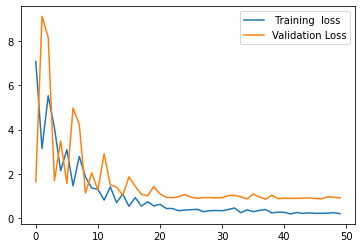

In [20]:
#Plotting the Loss Curve

plt.plot(x.history['loss'], label=' Training  loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

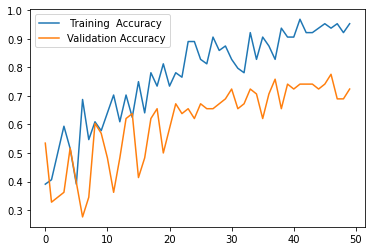

In [21]:
#Plotting the accuracy curve for the model

plt.plot(x.history['accuracy'], label=' Training  Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [23]:
#Saving File

from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [24]:
from google.colab import files
files.download('model_resnet50.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
#Predicting
y_pred=model.predict(test_set)

In [29]:
#1st Value gives Audi Class Probability, 2nd giving Lamborghini, 3rd one is Mercedeas.
y_pred

array([[1.31002069e-01, 6.43092215e-01, 2.25905761e-01],
       [9.70483065e-01, 1.60322245e-02, 1.34847416e-02],
       [8.22817720e-03, 8.92943084e-01, 9.88287553e-02],
       [6.99069526e-04, 9.69191670e-01, 3.01091895e-02],
       [1.07209105e-02, 2.17330037e-03, 9.87105846e-01],
       [3.25261764e-02, 5.26870042e-02, 9.14786816e-01],
       [1.31606191e-01, 5.08679032e-01, 3.59714776e-01],
       [2.19299588e-02, 9.41358972e-03, 9.68656540e-01],
       [2.64584832e-02, 8.15168738e-01, 1.58372760e-01],
       [8.65599871e-01, 7.73127228e-02, 5.70873432e-02],
       [4.07940485e-02, 4.05678246e-03, 9.55149174e-01],
       [3.74511592e-02, 9.26170826e-01, 3.63780484e-02],
       [5.14215291e-01, 2.16743842e-01, 2.69040883e-01],
       [3.66314165e-02, 6.78633386e-03, 9.56582189e-01],
       [1.96656454e-02, 4.92124110e-01, 4.88210201e-01],
       [2.47229692e-02, 3.63697022e-01, 6.11579955e-01],
       [3.57308015e-02, 3.23725343e-01, 6.40543818e-01],
       [1.66481994e-02, 7.19765

In [30]:
#Only showing the class probabilty which is the highest
y_pred=np.argmax(y_pred, axis=1)

In [31]:
#0-Audi, 1-Lamb, 2-Mercedes
y_pred

array([1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 0,
       2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1])

In [32]:
model=load_model('model_resnet50.h5')

In [66]:
#Uploading the file

from google.colab import files
uploaded = files.upload()

Saving lam.jpg to lam (2).jpg


In [67]:
img=image.load_img('lam (2).jpg', target_size=(224,224))

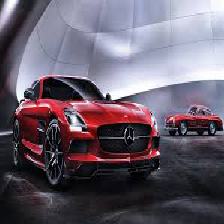

In [68]:
img

In [69]:
#For testing we have to convert this into array as the datagen function also does this thing
r=image.img_to_array(img)
r

array([[[ 33.,  37.,  40.],
        [ 41.,  44.,  49.],
        [ 49.,  52.,  57.],
        ...,
        [250., 252., 251.],
        [253., 255., 254.],
        [253., 255., 254.]],

       [[ 38.,  42.,  45.],
        [ 47.,  50.,  55.],
        [ 56.,  59.,  66.],
        ...,
        [250., 252., 251.],
        [253., 255., 254.],
        [253., 255., 254.]],

       [[ 38.,  42.,  45.],
        [ 47.,  50.,  55.],
        [ 56.,  59.,  66.],
        ...,
        [250., 252., 251.],
        [253., 255., 254.],
        [253., 255., 254.]],

       ...,

       [[ 13.,  14.,  19.],
        [ 13.,  14.,  19.],
        [ 13.,  14.,  19.],
        ...,
        [ 35.,  35.,  43.],
        [ 35.,  35.,  43.],
        [ 35.,  35.,  43.]],

       [[ 13.,  14.,  19.],
        [ 13.,  14.,  19.],
        [ 13.,  14.,  19.],
        ...,
        [ 35.,  35.,  43.],
        [ 35.,  35.,  43.],
        [ 35.,  35.,  43.]],

       [[ 13.,  14.,  19.],
        [ 13.,  14.,  19.],
        [ 13.,  

In [70]:
r.shape

(224, 224, 3)

In [71]:
#As we have reized like this in datagen
r=r/255

In [72]:
r=np.expand_dims(r, axis=0)
img_data=preprocess_input(r)
img_data.shape

(1, 224, 224, 3)

In [73]:
model.predict(img_data)


array([[0.01653546, 0.01824815, 0.9652164 ]], dtype=float32)

In [74]:
a=np.argmax(model.predict(img_data), axis=1)


In [75]:
if(a==0):
  print('Audi')
elif(a==1):
    print('Lamb')
elif(a==2):
    print('Merc')

Merc
